# Analysis of cleaned Bubble Sort data, PC 16 only
## This notebook is used to answer SQ 2, SQ 3 and the RQ of our project. 

#### Imports and loading CSVs in Dataframes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from operator import itemgetter
from scipy.stats import shapiro 

dfBubble6 = pd.read_csv("CleanData/BubbleClean-PC6.csv")
dfBubble16 = pd.read_csv("CleanData/BubbleClean-PC16.csv")
dfBubble21 = pd.read_csv("CleanData/BubbleClean-PC21.csv")
dfBubble23 = pd.read_csv("CleanData/BubbleClean-PC23.csv")

dfQuick16 = pd.read_csv("CleanData/QuickClean-PC16.csv")
dfRead6 = pd.read_csv("CleanData/readCSVClean-PC6.csv")
dfRead16 = pd.read_csv("CleanData/readCSVClean-PC16.csv")
dfRead21 = pd.read_csv("CleanData/readCSVClean-PC21.csv")
dfRead23 = pd.read_csv("CleanData/readCSVClean-PC23.csv")


dfBubble16.head()

,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Input case,Size
0,3.971802,3.439758,0.211914,436.274,67.0,best,25000.0
1,3.906067,3.412231,0.196228,387.021,67.0,best,25000.0
2,4.092834,3.593201,0.196289,403.466,67.0,best,25000.0
3,4.208069,3.704956,0.201599,407.394,67.0,best,25000.0
4,3.952576,3.416504,0.207581,446.493,67.0,best,25000.0


In [2]:
dfRead16.head()

,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Input case,Size
0,2.240601,1.966187,0.134399,227.880,53.0,random1,25000
1,2.062317,1.775085,0.126160,250.212,53.0,random1,25000
2,2.140869,1.876709,0.121887,222.526,53.0,random1,25000
3,2.217102,1.940735,0.133545,226.620,53.0,random1,25000
4,2.058533,1.796814,0.119385,219.516,53.0,random1,25000


In [3]:
def calcMean(df,type,size):
    rowMean = df[df["Input case"] == type][df["Size"]==size].mean()
    rowMean["Input case"] = type
    return rowMean
    

def meansOfTests(df):
    s = [25000,50000,75000,100000,200000,300000,400000,500000]
    c = ["best", "worst", "random1","random2","random3","random4","random5","random6","random7","random8","random9","random10",]
    l = []
    for case in c:
        for size in s:
            l.append(calcMean(df, case, size))   
    
    dfMeans = pd.concat([series.to_frame().T for series in l], ignore_index=True)
    return dfMeans

dfBubbleMean6 = meansOfTests(dfBubble6)
dfBubbleMean16 = meansOfTests(dfBubble16)
dfBubbleMean21 = meansOfTests(dfBubble21)
dfBubbleMean23 = meansOfTests(dfBubble23)

dfQuickMean16 = meansOfTests(dfQuick16)
dfBubbleMean16


<ipython-input-3-a1cb6d14708b>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rowMean = df[df["Input case"] == type][df["Size"]==size].mean()


,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Size,Input case
0,4.13115,3.61917,0.20069,409.145,68.3453,25000,best
1,7.62605,6.67748,0.296455,877.971,66.058,50000,best
2,16.708,14.6685,0.503585,2100.78,62.6731,75000,best
3,27.2136,23.9209,0.740464,3502.27,61.6223,100000,best
4,99.2977,87.4707,2.34841,13055.8,61.4,200000,best
...,...,...,...,...,...,...,...
91,144.978,126.161,3.6453,21001.3,58.9722,100000,random10
92,580.759,505.308,14.2135,84529.3,58.5758,200000,random10
93,1308.05,1139.03,31.6384,189277,59.8947,300000,random10
94,2324.83,2024.55,56.2029,335993,60.2857,400000,random10


In [4]:

def listOfCases(df):
    l = []
    for i in range(len(df)):
        if df["Input case"].iloc[i] not in l:
            l.append(df["Input case"].iloc[i])
    return l


def meansOfTestsReadCSV(df):
    s = [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
    c = listOfCases(df)
    l = []
    for case in range(len(c)):
        for size in range(len(s)):
            l.append(calcMean(df, c[case], s[size]))  

    dfMeans = pd.concat([series.to_frame().T  for series in l], ignore_index=True)
    return dfMeans

dfReadMean6 = meansOfTestsReadCSV(dfRead6)
dfReadMean16 = meansOfTestsReadCSV(dfRead16)
dfReadMean21 = meansOfTestsReadCSV(dfRead21)
dfReadMean23 = meansOfTestsReadCSV(dfRead23)
dfReadMean16

<ipython-input-3-a1cb6d14708b>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rowMean = df[df["Input case"] == type][df["Size"]==size].mean()


,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Size,Input case
0,2.14915,1.87396,0.12836,231.807,53.9737,25000,random1
1,2.51943,2.18513,0.150334,264.781,57,50000,random1
2,3.05994,2.66851,0.178193,304.554,61,75000,random1
3,3.52485,3.07726,0.205626,343.571,63.5278,100000,random1
4,4.16606,3.62685,0.233299,420.754,65.425,200000,random1
...,...,...,...,...,...,...,...
333,5.76346,5.00365,0.308558,583.527,71.9871,600000,sorted
334,6.14807,5.33067,0.330684,631.253,70.9112,700000,sorted
335,6.69911,5.80867,0.349253,706.156,70.1407,800000,sorted
336,7.18797,6.25124,0.367782,776.198,69.3281,900000,sorted


In [5]:
dfBubbleMean6 = dfBubbleMean6.reset_index(drop=True)
dfBubbleMean16 = dfBubbleMean16.reset_index(drop=True)
dfBubbleMean21 = dfBubbleMean21.reset_index(drop=True)
dfBubbleMean23 = dfBubbleMean23.reset_index(drop=True)

dfQuickMean16 = dfQuickMean16.reset_index(drop=True)
dfReadMean6 = dfReadMean6.reset_index(drop=True)
dfReadMean16 = dfReadMean16.reset_index(drop=True)
dfReadMean21 = dfReadMean21.reset_index(drop=True)
dfReadMean23 = dfReadMean23.reset_index(drop=True)

dfBubbleMean16
#remove nans here?

,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Size,Input case
0,4.13115,3.61917,0.20069,409.145,68.3453,25000,best
1,7.62605,6.67748,0.296455,877.971,66.058,50000,best
2,16.708,14.6685,0.503585,2100.78,62.6731,75000,best
3,27.2136,23.9209,0.740464,3502.27,61.6223,100000,best
4,99.2977,87.4707,2.34841,13055.8,61.4,200000,best
...,...,...,...,...,...,...,...
91,144.978,126.161,3.6453,21001.3,58.9722,100000,random10
92,580.759,505.308,14.2135,84529.3,58.5758,200000,random10
93,1308.05,1139.03,31.6384,189277,59.8947,300000,random10
94,2324.83,2024.55,56.2029,335993,60.2857,400000,random10


In [6]:
def deductReadFromAlg(dfMeanAlg, dfReadMean):
    lCPU = []
    lTime = []
    lDRAM = []

    for i in range(len(dfMeanAlg["Size"])):
        case = dfMeanAlg["Input case"][i]
        size = dfMeanAlg["Size"][i]
        #define best, worst and random inputs for each alg here!
        if case == "best":
                case2 = "sorted"
        if case == "worst":
            case2 = "reversesorted"
        if case.startswith("random"):
            case2 = "random"+case.split("m")[-1]

        rawCPU = dfMeanAlg[dfMeanAlg["Input case"] == case][dfMeanAlg["Size"]==size]["CPU (J)"][dfMeanAlg[dfMeanAlg["Input case"] == case][dfMeanAlg["Size"]==size]["CPU (J)"].index.tolist()[0]]
        readCPU = dfReadMean[dfReadMean["Input case"] == case2][dfReadMean["Size"]==size]["CPU (J)"][dfReadMean[dfReadMean["Input case"] == case2][dfReadMean["Size"]==size]["CPU (J)"].index.tolist()[0]]
        lCPU.append(rawCPU-readCPU)

        rawTime = dfMeanAlg[dfMeanAlg["Input case"] == case][dfMeanAlg["Size"]==size]["Time (ms)"][dfMeanAlg[dfMeanAlg["Input case"] == case][dfMeanAlg["Size"]==size]["Time (ms)"].index.tolist()[0]]
        readTime = dfReadMean[dfReadMean["Input case"] == case2][dfReadMean["Size"]==size]["Time (ms)"][dfReadMean[dfReadMean["Input case"] == case2][dfReadMean["Size"]==size]["Time (ms)"].index.tolist()[0]]
        lTime.append(rawTime - readTime)

        rawDRAM = dfMeanAlg[dfMeanAlg["Input case"] == case][dfMeanAlg["Size"]==size]["DRAM (J)"][dfMeanAlg[dfMeanAlg["Input case"] == case][dfMeanAlg["Size"]==size]["DRAM (J)"].index.tolist()[0]]
        readDRAM = dfReadMean[dfReadMean["Input case"] == case2][dfReadMean["Size"]==size]["DRAM (J)"][dfReadMean[dfReadMean["Input case"] == case2][dfReadMean["Size"]==size]["DRAM (J)"].index.tolist()[0]]
        lDRAM.append(rawDRAM-readDRAM)

    dfMeanAlg["CPU - readCSV"] = lCPU
    dfMeanAlg["Time - readCSV"] = lTime
    dfMeanAlg["Memory - readCSV"] = lDRAM


deductReadFromAlg(dfBubbleMean6,dfReadMean6)
deductReadFromAlg(dfBubbleMean16,dfReadMean16)
deductReadFromAlg(dfBubbleMean21,dfReadMean21)
deductReadFromAlg(dfBubbleMean23,dfReadMean23)

deductReadFromAlg(dfQuickMean16,dfReadMean16)

dfBubbleMean16.head()

<ipython-input-6-5f679c6fee5f>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rawCPU = dfMeanAlg[dfMeanAlg["Input case"] == case][dfMeanAlg["Size"]==size]["CPU (J)"][dfMeanAlg[dfMeanAlg["Input case"] == case][dfMeanAlg["Size"]==size]["CPU (J)"].index.tolist()[0]]
<ipython-input-6-5f679c6fee5f>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  readCPU = dfReadMean[dfReadMean["Input case"] == case2][dfReadMean["Size"]==size]["CPU (J)"][dfReadMean[dfReadMean["Input case"] == case2][dfReadMean["Size"]==size]["CPU (J)"].index.tolist()[0]]
<ipython-input-6-5f679c6fee5f>:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rawTime = dfMeanAlg[dfMeanAlg["Input case"] == case][dfMeanAlg["Size"]==size]["Time (ms)"][dfMeanAlg[dfMeanAlg["Input case"] == case][dfMeanAlg["Size"]==size]["Time (ms)"].index.tolist()[0]]
<ipython-input-6-5f679c6fee5f>:22: UserWarning: Boolean Series key will be reindexed to m

,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Size,Input case,CPU - readCSV,Time - readCSV,Memory - readCSV
0,4.13115,3.61917,0.20069,409.145,68.3453,25000,best,1.934188,201.900091,0.086675
1,7.62605,6.67748,0.296455,877.971,66.058,50000,best,4.543261,631.845264,0.154319
2,16.708,14.6685,0.503585,2100.78,62.6731,75000,best,12.113200,1816.149317,0.332747
3,27.2136,23.9209,0.740464,3502.27,61.6223,100000,best,21.055334,3188.023727,0.551743
4,99.2977,87.4707,2.34841,13055.8,61.4,200000,best,83.830459,12658.438980,2.121239


In [7]:
dfBubbleMean16[dfBubbleMean16["Size"]==500000]

,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Size,Input case,CPU - readCSV,Time - readCSV,Memory - readCSV
7,435.624,383.595,10.3003,57793.4,60.1774,500000,best,378.931746,57254.718091,10.009797
15,808.179,711.326,19.1242,107508,60.0761,500000,worst,706.634824,106962.204538,18.828578
23,3633.48,3163.15,89.0284,525555,59.9714,500000,random1,3158.340906,524999.630000,88.729538
31,3637.74,3167.81,89.1923,525822,61.0263,500000,random2,3162.993189,525260.077059,88.891742
39,3633.48,3163.37,88.6592,525444,59.8889,500000,random3,3158.339991,524874.570616,88.339361
47,3641.31,3171.28,89.3414,526105,61.0513,500000,random4,3166.312939,525529.835433,89.031714
55,3630.7,3161.54,88.9759,525923,60.1714,500000,random5,3156.774795,525366.546329,88.680179
63,3636.11,3166.6,89.3091,525979,60,500000,random6,3161.484503,525396.145789,88.991264
71,3631.74,3162.5,89.356,525363,60.0513,500000,random7,3157.737833,524810.322377,89.060704
79,3629.39,3160.33,89.069,525077,60.0263,500000,random8,3155.512575,524515.440419,88.768531


# Shapiro Wilks Test 

In [8]:
dfBubbleSortBest16 = dfBubble16[dfBubble16["Input case"].str.startswith("best")]
dfBubbleSortWorst16 = dfBubble16[dfBubble16["Input case"].str.startswith("worst")]
dfBubbleSortRandom1 = dfBubble16[dfBubble16["Input case"].str.endswith("random1")]
dfBubbleSortRandom2 = dfBubble16[dfBubble16["Input case"].str.startswith("random3")]
dfBubbleSortRandom3 = dfBubble16[dfBubble16["Input case"].str.startswith("random3")]
dfBubbleSortRandom4 = dfBubble16[dfBubble16["Input case"].str.startswith("random4")]
dfBubbleSortRandom5 = dfBubble16[dfBubble16["Input case"].str.startswith("random5")]
dfBubbleSortRandom6 = dfBubble16[dfBubble16["Input case"].str.startswith("random6")]
dfBubbleSortRandom7 = dfBubble16[dfBubble16["Input case"].str.startswith("random7")]
dfBubbleSortRandom8 = dfBubble16[dfBubble16["Input case"].str.startswith("random8")]
dfBubbleSortRandom9 = dfBubble16[dfBubble16["Input case"].str.startswith("random9")]
dfBubbleSortRandom10 = dfBubble16[dfBubble16["Input case"].str.startswith("random10")]



print(dfBubbleSortRandom1)


          PKG (J)      CPU (J)   DRAM (J)  Time (ms)  Temp (C) Input case  \
2823    13.232300    11.544128   0.399902    1710.16      69.0    random1   
2824    14.163696    12.361511   0.493103    1723.56      69.0    random1   
2825    13.530029    11.768127   0.451172    1730.49      69.0    random1   
2826    14.085632    12.302307   0.486084    1704.74      70.0    random1   
2827    14.142822    12.376465   0.485718    1699.14      70.0    random1   
...           ...          ...        ...        ...       ...        ...   
3093  3634.156372  3162.602661  88.959717  525532.00      58.0    random1   
3094  3618.564941  3146.910522  89.083984  525657.00      57.0    random1   
3095  3640.937012  3172.212952  88.107239  525325.00      63.0    random1   
3096  3620.315857  3148.098999  89.073242  525615.00      57.0    random1   
3097  3625.471497  3154.129333  88.283569  525564.00      57.0    random1   

          Size  
2823   25000.0  
2824   25000.0  
2825   25000.0  
2826   

In [9]:
dfBubbleSortBest16 = dfBubble16[dfBubble16["Input case"].str.startswith("best")]
print(dfBubbleSortBest16)

         PKG (J)     CPU (J)   DRAM (J)  Time (ms)  Temp (C) Input case  \
0       3.971802    3.439758   0.211914    436.274      67.0       best   
1       3.906067    3.412231   0.196228    387.021      67.0       best   
2       4.092834    3.593201   0.196289    403.466      67.0       best   
3       4.208069    3.704956   0.201599    407.394      67.0       best   
4       3.952576    3.416504   0.207581    446.493      67.0       best   
...          ...         ...        ...        ...       ...        ...   
2818  431.166931  379.487732   9.919800  57515.400      57.0       best   
2819  437.413879  385.345886  10.358276  57861.500      63.0       best   
2820  437.612915  385.795898  10.052307  57637.800      63.0       best   
2821  437.277649  385.316528  10.179382  57746.100      63.0       best   
2822  437.159912  385.186523  10.126831  57734.200      63.0       best   

          Size  
0      25000.0  
1      25000.0  
2      25000.0  
3      25000.0  
4      25000.0

In [10]:
dfBubbleSortBest16[dfBubbleSortBest16["Size"]==700000]["CPU (J)"]

Series([], Name: CPU (J), dtype: float64)

In [11]:
dataBest = []
sizeBest = []
for i in [25000,50000,75000,100000,200000,300000,400000,500000]:
    if 0.05 < shapiro(dfBubbleSortBest16[dfBubbleSortBest16["Size"]==i]["CPU (J)"]).pvalue:
        dataBest.append(1)
    else:
        dataBest.append(0)
    sizeBest.append(i)
    print(shapiro(dfBubbleSortBest16[dfBubbleSortBest16["Size"]==i]["CPU (J)"]).pvalue)
print(dataBest)

0.00016553574823774397
8.382151861496823e-08
0.005283207632601261
1.2180346857348923e-05
2.1137592544351325e-12
2.5511571007783027e-27
4.006334380999427e-14
5.946838160797441e-11
[0, 0, 0, 0, 0, 0, 0, 0]


In [12]:
dataWorst = []
sizeWorst = []
for i in [25000,50000,75000,100000,200000,300000,400000,500000]:
    if 0.05 < shapiro(dfBubbleSortWorst16[dfBubbleSortWorst16["Size"]==i]["CPU (J)"]).pvalue:
        dataWorst.append(1)
    else:
        dataWorst.append(0)
    sizeWorst.append(i)
    print(shapiro(dfBubbleSortWorst16[dfBubbleSortWorst16["Size"]==i]["CPU (J)"]).pvalue)
print(dataWorst)

0.000409560336265713
5.816473181325136e-15
0.4584461748600006
0.0027566892094910145
0.0072866640985012054
0.0001698013802524656
0.0008483649580739439
0.004222020972520113
[0, 0, 1, 0, 0, 0, 0, 0]


In [13]:
dataRandom1 = []
sizeRandom1 = []
for i in [25000,50000,75000,100000,200000,300000,400000,500000]:
    if 0.05 < shapiro(dfBubbleSortRandom1[dfBubbleSortRandom1["Size"]==i]["CPU (J)"]).pvalue:
        dataRandom1.append(1)
    else:
        dataRandom1.append(0)
    sizeRandom1.append(i)
    print(shapiro(dfBubbleSortRandom1[dfBubbleSortRandom1["Size"]==i]["CPU (J)"]).pvalue)
print(dataRandom1)

0.025805655866861343
0.5420860648155212
0.07286867499351501
0.034866079688072205
0.05101707950234413
0.15643316507339478
0.1467924863100052
0.06111671403050423
[0, 1, 1, 0, 1, 1, 1, 1]


In [14]:
dataRandom2 = []
sizeRandom2 = []
for i in [25000,50000,75000,100000,200000,300000,400000,500000]:
    if 0.05 < shapiro(dfBubbleSortRandom2[dfBubbleSortRandom2["Size"]==i]["CPU (J)"]).pvalue:
        dataRandom2.append(1)
    else:
        dataRandom2.append(0)
    sizeRandom2.append(i)
    print(shapiro(dfBubbleSortRandom2[dfBubbleSortRandom2["Size"]==i]["CPU (J)"]).pvalue)
print(dataRandom2)

0.1151442900300026
0.3894113302230835
0.31620895862579346
0.09754227101802826
0.031250447034835815
0.22925646603107452
0.001001450582407415
0.10261284559965134
[1, 1, 1, 1, 0, 1, 0, 1]


In [15]:
dataRandom3 = []
sizeRandom3 = []
for i in [25000,50000,75000,100000,200000,300000,400000,500000]:
    if 0.05 < shapiro(dfBubbleSortRandom3[dfBubbleSortRandom3["Size"]==i]["CPU (J)"]).pvalue:
        dataRandom3.append(1)
    else:
        dataRandom3.append(0)
    sizeRandom3.append(i)
    print(shapiro(dfBubbleSortRandom3[dfBubbleSortRandom3["Size"]==i]["CPU (J)"]).pvalue)
print(dataRandom3)

0.1151442900300026
0.3894113302230835
0.31620895862579346
0.09754227101802826
0.031250447034835815
0.22925646603107452
0.001001450582407415
0.10261284559965134
[1, 1, 1, 1, 0, 1, 0, 1]


In [16]:
dataRandom4 = []
sizeRandom4 = []
for i in [25000,50000,75000,100000,200000,300000,400000,500000]:
    if 0.05 < shapiro(dfBubbleSortRandom4[dfBubbleSortRandom4["Size"]==i]["CPU (J)"]).pvalue:
        dataRandom4.append(1)
    else:
        dataRandom4.append(0)
    sizeRandom4.append(i)
    print(shapiro(dfBubbleSortRandom4[dfBubbleSortRandom4["Size"]==i]["CPU (J)"]).pvalue)
print(dataRandom4)

0.006460634991526604
0.06354500353336334
0.08418142795562744
0.06139310821890831
0.0009074481204152107
0.03196122497320175
0.0004796619468834251
0.07734185457229614
[0, 1, 1, 1, 0, 0, 0, 1]


In [17]:
dataRandom5 = []
sizeRandom5 = []
for i in [25000,50000,75000,100000,200000,300000,400000,500000]:
    if 0.05 < shapiro(dfBubbleSortRandom5[dfBubbleSortRandom5["Size"]==i]["CPU (J)"]).pvalue:
        dataRandom5.append(1)
    else:
        dataRandom5.append(0)
    sizeRandom5.append(i)
    print(shapiro(dfBubbleSortRandom5[dfBubbleSortRandom5["Size"]==i]["CPU (J)"]).pvalue)
print(dataRandom5)

0.41135314106941223
4.011608112364229e-08
0.25179043412208557
0.08396147936582565
0.005245502106845379
0.10160431265830994
0.72422194480896
0.15468642115592957
[1, 0, 1, 1, 0, 1, 1, 1]


In [18]:
dataRandom6 = []
sizeRandom6 = []
for i in [25000,50000,75000,100000,200000,300000,400000,500000]:
    if 0.05 < shapiro(dfBubbleSortRandom6[dfBubbleSortRandom6["Size"]==i]["CPU (J)"]).pvalue:
        dataRandom6.append(1)
    else:
        dataRandom6.append(0)
    sizeRandom6.append(i)
    print(shapiro(dfBubbleSortRandom6[dfBubbleSortRandom6["Size"]==i]["CPU (J)"]).pvalue)
print(dataRandom6)

0.15964771807193756
7.815091151996967e-08
0.46750399470329285
0.004842258524149656
0.06662899255752563
0.022953713312745094
0.5889678597450256
0.5787785053253174
[1, 0, 1, 0, 1, 0, 1, 1]


In [19]:
dataRandom7 = []
sizeRandom7 = []
for i in [25000,50000,75000,100000,200000,300000,400000,500000]:
    if 0.05 < shapiro(dfBubbleSortRandom7[dfBubbleSortRandom7["Size"]==i]["CPU (J)"]).pvalue:
        dataRandom7.append(1)
    else:
        dataRandom7.append(0)
    sizeRandom7.append(i)
    print(shapiro(dfBubbleSortRandom7[dfBubbleSortRandom7["Size"]==i]["CPU (J)"]).pvalue)
print(dataRandom7)

0.0455862358212471
4.3850665321087945e-08
0.074835866689682
0.189018115401268
0.0036954660899937153
0.01665322668850422
0.33656391501426697
0.03384948894381523
[0, 0, 1, 1, 0, 0, 1, 0]


In [20]:
dataRandom8 = []
sizeRandom8 = []
for i in [25000,50000,75000,100000,200000,300000,400000,500000]:
    if 0.05 < shapiro(dfBubbleSortRandom8[dfBubbleSortRandom8["Size"]==i]["CPU (J)"]).pvalue:
        dataRandom8.append(1)
    else:
        dataRandom8.append(0)
    sizeRandom8.append(i)
    print(shapiro(dfBubbleSortRandom8[dfBubbleSortRandom8["Size"]==i]["CPU (J)"]).pvalue)
print(dataRandom8)

0.0011626083869487047
4.937879438671189e-08
0.32838737964630127
0.01305423304438591
0.0004053895827382803
0.05550014600157738
0.28292354941368103
0.25416815280914307
[0, 0, 1, 0, 0, 1, 1, 1]


In [21]:
dataRandom9 = []
sizeRandom9 = []
for i in [25000,50000,75000,100000,200000,300000,400000,500000]:
    if 0.05 < shapiro(dfBubbleSortRandom9[dfBubbleSortRandom9["Size"]==i]["CPU (J)"]).pvalue:
        dataRandom9.append(1)
    else:
        dataRandom9.append(0)
    sizeRandom9.append(i)
    print(shapiro(dfBubbleSortRandom9[dfBubbleSortRandom9["Size"]==i]["CPU (J)"]).pvalue)
print(dataRandom9)

0.07959172874689102
0.6032268404960632
0.16968749463558197
0.018424026668071747
0.004678241442888975
0.12583321332931519
0.00967585202306509
0.039175573736429214
[1, 1, 1, 0, 0, 1, 0, 0]


In [22]:
dataRandom10 = []
sizeRandom10 = []
for i in [25000,50000,75000,100000,200000,300000,400000,500000]:
    if 0.05 < shapiro(dfBubbleSortRandom10[dfBubbleSortRandom10["Size"]==i]["CPU (J)"]).pvalue:
        dataRandom10.append(1)
    else:
        dataRandom10.append(0)
    sizeRandom10.append(i)
    print(shapiro(dfBubbleSortRandom10[dfBubbleSortRandom10["Size"]==i]["CPU (J)"]).pvalue)
print(dataRandom10)

0.45799243450164795
0.18417790532112122
0.660079836845398
0.012659361585974693
0.008006357587873936
0.020759563893079758
0.020982161164283752
0.017916828393936157
[1, 1, 1, 0, 0, 0, 0, 0]


# PLOTS

## SQ 2: Time vs input size regressions

In [23]:
# For bubblesort: polynomial regression
def polyReg(SeriesX, SeriesY,dg, Label, color, plotLabel = True, regLine=True, printR2Score = True, plotGraph = True, dots="o"):
    X = SeriesX.values.reshape(SeriesX.size, -1)
    y = SeriesY.values

    fitness = []
   #for dg in range(minDegrees, maxDegrees):
    # Create an empty polynomial function with degree of 4
    poly_reg = PolynomialFeatures(degree=dg)
    
    # Fit the function to the X and transform X to the polynomial format
    X_poly = poly_reg.fit_transform(X)

    # Now we construct a Multiple Linear Regressor on the transformed X_ploy
    lr_2 = LinearRegression()  
    lr_2.fit(X_poly, y)  
    
    # Get the y values using the constructed Multiple Linear Regressor
    y_poly = lr_2.predict(X_poly)
    
    r2 = metrics.r2_score(y,y_poly)
    #if printR2Score:
    #    print(f"r2_score for {Label} {dg} is: {r2}")
    fitness.append((f"poly {dg}dg", r2, y_poly))
    #print(f"Parameters of poly: {poly_reg.get_params()}") #does not give what we are looking for
    
    if plotGraph:
        plt.plot(X, y,dots, color=color,markersize=10, markerfacecolor = "none")
        if r2 > 0.5 and regLine:
            plt.plot(X, y_poly, color=color, linewidth=2)
        #plt.legend(loc='upper left')
    #print(lr_2.intercept_, lr_2.coef_)
    return max(fitness,key=itemgetter(1))

In [24]:
def getIndex(df,case,size):
    return df[df["Input case"] == case][df["Size"]==size].index.tolist()[0]


In [25]:
def calcPercent(df):
    cpuPercent = []
    pkgPercent = []
    fullEC = []
    size2 = []
    for case in ["best", "worst", "random"]:
        if case != "random":
            for size in [25000,50000,75000,100000,200000,300000,400000,500000]:
                cpuPercent.append(df["CPU (J)"][getIndex(df,case,size)] / df["PKG (J)"][getIndex(df,case,size)] * 100)
                pkgPercent.append(100)
                fullEC.append(df["CPU - readCSV"][getIndex(df,case,size)]+df["Memory - readCSV"][getIndex(df,case,size)])
                size2.append(df["Size"][getIndex(df,case,size)] * df["Size"][getIndex(df,case,size)])
        else :
            for i in range(1,11):
                for size in [25000,50000,75000,100000,200000,300000,400000,500000]:
                    cpuPercent.append(df["CPU (J)"][getIndex(df,case+str(i),size)] / df["PKG (J)"][getIndex(df,case+str(i),size)] * 100)
                    pkgPercent.append(100)
                    fullEC.append(df["CPU - readCSV"][getIndex(df,case+str(i),size)]+df["Memory - readCSV"][getIndex(df,case+str(i),size)])
                    size2.append(df["Size"][getIndex(df,case+str(i),size)] * df["Size"][getIndex(df,case+str(i),size)])

    df["CPU % of PKG"] = cpuPercent
    df["PKG %"] = pkgPercent
    df["full EC"] = fullEC
    df["Size^2"] = size2

calcPercent(dfBubbleMean6)
calcPercent(dfBubbleMean16)
calcPercent(dfBubbleMean21)
calcPercent(dfBubbleMean23)

calcPercent(dfQuickMean16)
dfBubbleMean16.head()

<ipython-input-24-565db17a79a7>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[df["Input case"] == case][df["Size"]==size].index.tolist()[0]


,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Size,Input case,CPU - readCSV,Time - readCSV,Memory - readCSV,CPU % of PKG,PKG %,full EC,Size^2
0,4.13115,3.61917,0.20069,409.145,68.3453,25000,best,1.934188,201.900091,0.086675,87.606776,100,2.020863,6.250000e+08
1,7.62605,6.67748,0.296455,877.971,66.058,50000,best,4.543261,631.845264,0.154319,87.561420,100,4.697579,2.500000e+09
2,16.708,14.6685,0.503585,2100.78,62.6731,75000,best,12.113200,1816.149317,0.332747,87.793384,100,12.445947,5.625000e+09
3,27.2136,23.9209,0.740464,3502.27,61.6223,100000,best,21.055334,3188.023727,0.551743,87.900250,100,21.607077,1.000000e+10
4,99.2977,87.4707,2.34841,13055.8,61.4,200000,best,83.830459,12658.438980,2.121239,88.089301,100,85.951698,4.000000e+10


In [26]:
dfBubbleMean16.to_csv("bubbleFinalData-PC16.csv", sep=",", index=False)

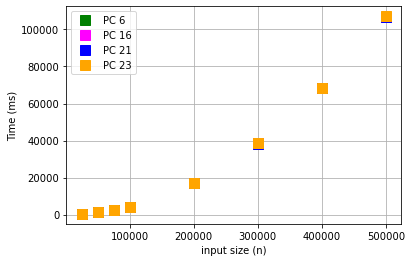

In [27]:
plt.plot(dfBubbleMean6[dfBubbleMean6["Input case"] == "worst"]["Size"], dfBubbleMean6[dfBubbleMean6["Input case"] == "worst"]["Time - readCSV"],"s", color="green",markersize=10, label="PC 6")
plt.plot(dfBubbleMean16[dfBubbleMean16["Input case"] == "worst"]["Size"], dfBubbleMean16[dfBubbleMean16["Input case"] == "worst"]["Time - readCSV"],"s", color="fuchsia",markersize=10, label="PC 16")
plt.plot(dfBubbleMean21[dfBubbleMean21["Input case"] == "worst"]["Size"], dfBubbleMean21[dfBubbleMean21["Input case"] == "worst"]["Time - readCSV"],"s", color="blue",markersize=10, label="PC 21")
plt.plot(dfBubbleMean23[dfBubbleMean23["Input case"] == "worst"]["Size"], dfBubbleMean23[dfBubbleMean23["Input case"] == "worst"]["Time - readCSV"],"s", color="orange",markersize=10, label="PC 23")

#plt.title("Bubble sort worst case Time (ms) vs input size.")
plt.xlabel("input size (n)")
plt.ylabel("Time (ms)")
plt.grid()
plt.legend()
plt.show()

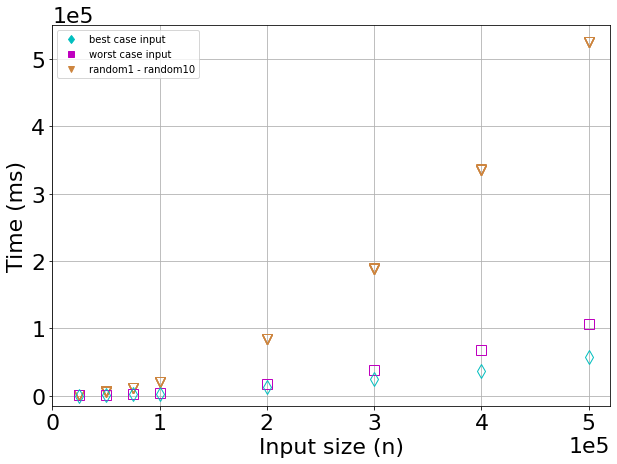

In [40]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

plt.plot(-100000,-100000,"d", color="c",label="best case input")
plt.plot(-100000,-100000,"s", color="m",label="worst case input")
plt.plot(-100000,-100000,"v", color="peru",label="random1 - random10")

for i in range(1,11):
    Rs.append(polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == f"random{i}"]["Size"], dfBubbleMean16[dfBubbleMean16["Input case"] == f"random{i}"]["Time - readCSV"],1, f"random{i} case input", "peru",dots="v",regLine=False))
worst = polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == "worst"]["Size"], dfBubbleMean16[dfBubbleMean16["Input case"] == "worst"]["Time - readCSV"],1, "Merge time for worst case input", "m",dots="s",regLine=False)
best = polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == "best"]["Size"], dfBubbleMean16[dfBubbleMean16["Input case"] == "best"]["Time - readCSV"],1, "Merge time for best case input", "c",dots="d",regLine=False)

#print(f"worst R2 ", worst[1], "\n")
#print(f"best R2 ", best[1], "\n")
# for i in range(len(Rs)):
#     print(f"random{i} R2", Rs[i][1], " \n")

#plt.title("Bubble sort wall time vs input size.")
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0)) #forces scientific notation!
plt.xlabel("Input size (n)", fontsize = 22)
plt.ylabel("Time (ms)", fontsize = 22)
plt.rc('xtick', labelsize= 22) 
plt.rc('ytick', labelsize= 22) 
plt.rc('legend')#, fontsize=10) #fontsize of the legend
plt.ylim(-15000,550000)
plt.xlim(0,520000)
plt.grid()
plt.legend()
plt.show()


## SQ 2: Time vs BigO

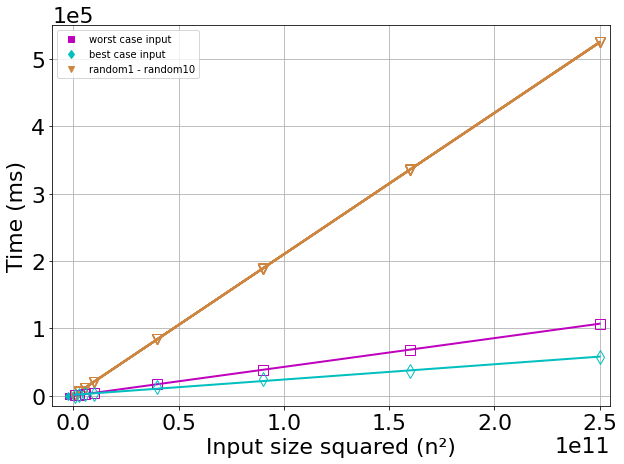

In [29]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

plt.plot(-2500000000,-0,"s", color="m",label="worst case input")
plt.plot(-2500000000,0,"d", color="c",label="best case input")
plt.plot(-200000,0,"v", color="peru",label="random1 - random10")

for i in range(1,11):
    Rs.append(polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == f"random{i}"]["Size^2"], dfBubbleMean16[dfBubbleMean16["Input case"] == f"random{i}"]["Time - readCSV"],1, f"random{i} case input", "peru",dots="v"))
worst = polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == "worst"]["Size^2"], dfBubbleMean16[dfBubbleMean16["Input case"] == "worst"]["Time - readCSV"],1, "Merge time for worst case input", "m",dots="s")
best = polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == "best"]["Size^2"], dfBubbleMean16[dfBubbleMean16["Input case"] == "best"]["Time - readCSV"],1, "Merge time for best case input", "c",dots="d")

# for i in range(len(Rs)):
#     print(f"random{i} R2", Rs[i][1], " \n")
#print(f"worst R2 ", worst[1], "\n")
#print(f"best R2 ", best[1], "\n")

#plt.title("Bubble sort wall time vs input size squared, with linear regression.")
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0)) #forces scientific notation!

plt.xlabel("Input size squared (n\u00b2)", fontsize = 22)
plt.ylabel("Time (ms)", fontsize = 22)
plt.rc('xtick', labelsize= 22) 
plt.rc('ytick', labelsize= 22) 
#plt.rc("legend", fontsize = 22)
plt.grid()
plt.ylim(-15000,550000)
plt.xlim(-0.1*10**11, 2.55*10**11)
plt.legend()
plt.show()


## Zoom: Time vs n^2

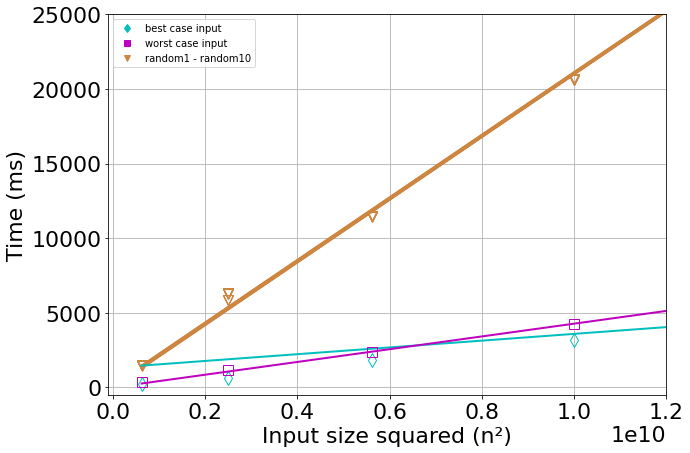

In [43]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []
plt.plot(-100000,-100000,"d", color="c",label="best case input")
plt.plot(-100000,-100000,"s", color="m",label="worst case input")
plt.plot(-100000,-100000,"v", color="peru",label="random1 - random10")

for i in range(1,11):
    Rs.append(polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == f"random{i}"]["Size^2"], dfBubbleMean16[dfBubbleMean16["Input case"] == f"random{i}"]["Time - readCSV"],1, f"random{i} case input", "peru",dots="v"))
best = polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == "best"]["Size^2"], dfBubbleMean16[dfBubbleMean16["Input case"] == "best"]["Time - readCSV"],1, "Merge time for best case input", "c",dots="d")
worst = polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == "worst"]["Size^2"], dfBubbleMean16[dfBubbleMean16["Input case"] == "worst"]["Time - readCSV"],1, "Merge time for worst case input", "m",dots="s")

# for i in range(len(Rs)):
#     print(f"random{i} R2", Rs[i][1], " \n")
# print(f"worst R2 ", worst[1], "\n")
# print(f"best R2 ", best[1], "\n")

#plt.title("Bubble sort wall time vs input size squared, with linear regression.")
plt.xlabel("Input size squared (n\u00b2)", fontsize = 22)
plt.ylabel("Time (ms)", fontsize = 22)
plt.rc('xtick', labelsize= 22) 
plt.rc('ytick', labelsize= 22) 
plt.grid()
plt.xlim(-0.1*10**9,12000000000)
plt.ylim(-500,25000)
plt.legend()
plt.show()


## SQ 3: Energy vs. Time


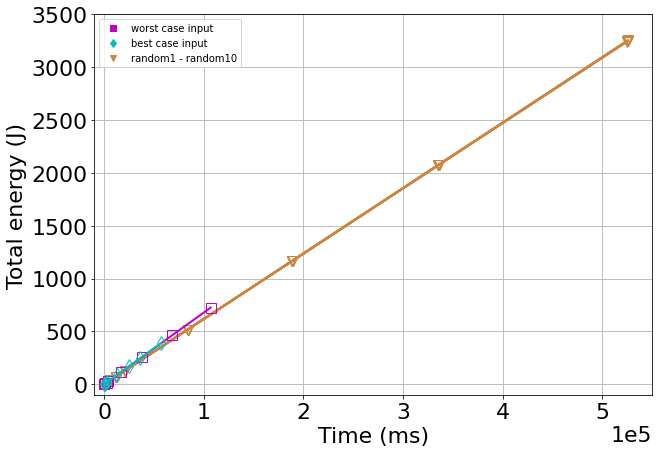

In [46]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

plt.plot(-20000,0,"s", color="m",label="worst case input")
plt.plot(0,0,"d", color="c",label="best case input")
plt.plot(-20000,0,"v", color="peru",label="random1 - random10")

for i in range(1,11):
    Rs.append(polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == f"random{i}"]["Time - readCSV"], dfBubbleMean16[dfBubbleMean16["Input case"] == f"random{i}"]["full EC"],1, f"Random{i} case input", "peru",dots="v"))

worst = polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == "worst"]["Time - readCSV"], dfBubbleMean16[dfBubbleMean16["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "m",dots="s")
best = polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == "best"]["Time - readCSV"], dfBubbleMean16[dfBubbleMean16["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "c",dots="d")

#print(f"worst R2 ", worst[1], "\n")
#print(f"best R2 ", best[1], "\n")
#for i in range(len(Rs)):
    #print(f"random{i} R2", Rs[i][1], " \n")

#plt.title("Bubble sort energy consumption vs wall time, with linear regression.")
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))

plt.ylabel("Total energy (J)", fontsize = 22)
plt.xlabel("Time (ms)", fontsize = 22)
plt.rc('xtick', labelsize= 22) 
plt.rc('ytick', labelsize= 22) 
plt.ylim(-100,3500)
plt.xlim(-10000,550000)
plt.legend()
plt.grid()
plt.show()


## Zoom: Energy vs. Time 

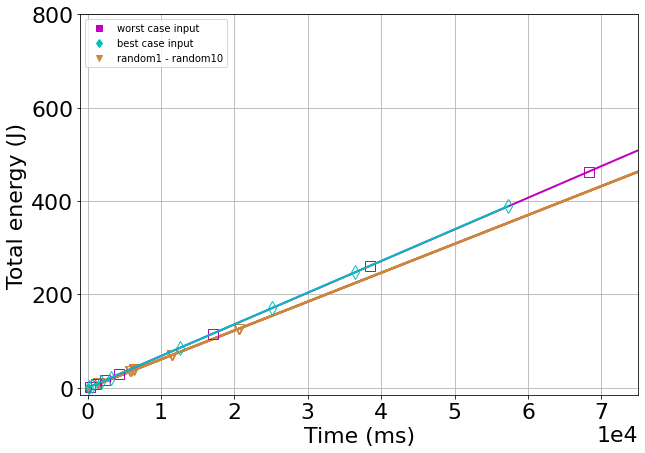

In [52]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

plt.plot(0,0,"s", color="m",label="worst case input")
plt.plot(0,0,"d", color="c",label="best case input")
plt.plot(0,0,"v", color="peru",label="random1 - random10")

for i in range(1,11):
    Rs.append(polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == f"random{i}"]["Time - readCSV"], dfBubbleMean16[dfBubbleMean16["Input case"] == f"random{i}"]["full EC"],1, f"Random{i} case input", "peru",dots="v"))
worst = polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == "worst"]["Time - readCSV"], dfBubbleMean16[dfBubbleMean16["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "m",dots="s")
best = polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == "best"]["Time - readCSV"], dfBubbleMean16[dfBubbleMean16["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "c",dots="d")

# print(f"best R2 ", best[1], "\n")
# print(f"worst R2 ", worst[1], "\n")
# for i in range(len(Rs)):
#     print(f"random{i} R2", Rs[i][1], " \n")

#plt.title("Bubble sort energy consumption vs wall time, with linear regression.")
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.ylabel("Total energy (J)" , fontsize =22)
plt.xlabel("Time (ms)", fontsize = 22)
plt.rc('xtick', labelsize= 22) 
plt.rc('ytick', labelsize= 22) 
plt.xlim(-1000,75000)
plt.ylim(-15,800)
plt.legend(loc="upper left")
plt.grid()
plt.show()

## RQ: EC vs BigO

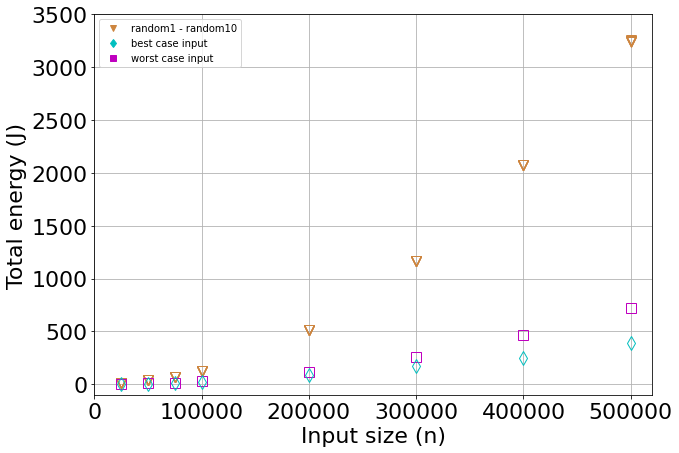

In [53]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []
plt.plot(-100000,-100000,"v", color="peru",label="random1 - random10")
plt.plot(-100000,-100000,"d", color="c",label="best case input")
plt.plot(-100000,-100000,"s", color="m",label="worst case input")

for i in range(1,11):
    Rs.append(polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == f"random{i}"]["Size"], dfBubbleMean16[dfBubbleMean16["Input case"] == f"random{i}"]["full EC"],1, f"random{i} case input", "peru",dots="v",regLine=False))
worst = polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == "worst"]["Size"], dfBubbleMean16[dfBubbleMean16["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "m",dots="s",regLine=False)
best = polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == "best"]["Size"], dfBubbleMean16[dfBubbleMean16["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "c",dots="d",regLine=False)

# for i in range(len(Rs)):
#     print(f"random{i} R2", Rs[i][1], " \n")
# print(f"worst R2 ", worst[1], "\n")
# print(f"best R2 ", best[1], "\n")

#plt.title("Bubble sort energy consumption vs input size.")
plt.xlabel("Input size (n)", fontsize = 22)
plt.ylabel("Total energy (J)", fontsize = 22)
plt.rc('xtick', labelsize= 22) 
plt.rc('ytick', labelsize= 22) 
plt.xlim(0,520000)
plt.ylim(-100,3500)
plt.grid()
plt.legend()
plt.show()

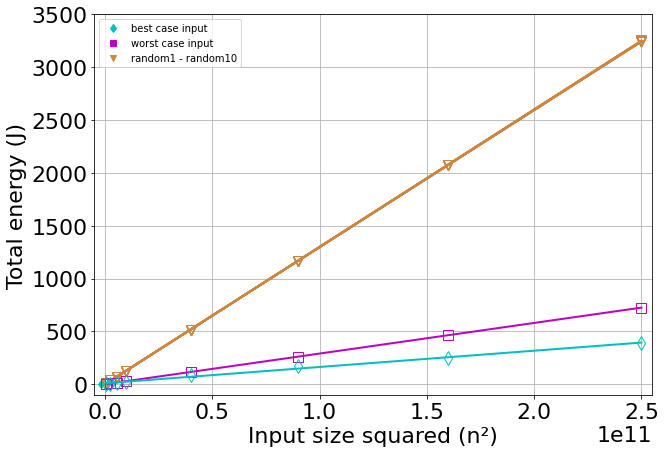

In [59]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

plt.plot(-2000000000,0,"d", color="c",label="best case input")
plt.plot(-10000000000,0,"s", color="m",label="worst case input")
plt.plot(-10000000000,0,"v", color="peru",label="random1 - random10")

for i in range(1,11):
    Rs.append(polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == f"random{i}"]["Size^2"], dfBubbleMean16[dfBubbleMean16["Input case"] == f"random{i}"]["full EC"],1, f"random{i} case input", "peru",dots="v"))
worst = polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == "worst"]["Size^2"], dfBubbleMean16[dfBubbleMean16["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "m",dots="s")
best = polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == "best"]["Size^2"], dfBubbleMean16[dfBubbleMean16["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "c",dots="d")

# for i in range(len(Rs)):
#     print(f"random{i} R2", Rs[i][1], " \n")
# print(f"worst R2 ", worst[1], "\n")
# print(f"best R2 ", best[1], "\n")

#plt.title("Bubble sort energy consumption vs input size squared, with linear regression.")
plt.xlabel("Input size squared (n\u00b2)", fontsize = 22)
plt.ylabel("Total energy (J)", fontsize = 22)
plt.rc('xtick', labelsize = 22)
plt.rc('ytick', labelsize = 22)
plt.grid()
plt.xlim(-0.05*10**11, 2.55*10**11)
plt.ylim(-100,3500)
plt.legend()
plt.show()

## Zoom: Energy vs. BigO

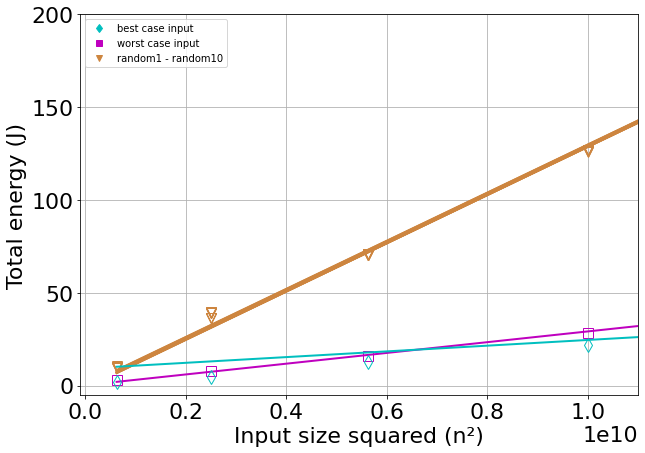

In [61]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

plt.plot(-110000000110,0,"d", color="c",label="best case input")
plt.plot(-1111000000011110,0,"s", color="m",label="worst case input")
plt.plot(-111100000110,0,"v", color="peru",label="random1 - random10")

for i in range(1,11):
    Rs.append(polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == f"random{i}"]["Size^2"], dfBubbleMean16[dfBubbleMean16["Input case"] == f"random{i}"]["full EC"],1, f"random{i} case input", "peru",dots="v"))
worst = polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == "worst"]["Size^2"], dfBubbleMean16[dfBubbleMean16["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "m",dots="s")
best = polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == "best"]["Size^2"], dfBubbleMean16[dfBubbleMean16["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "c",dots="d")

# for i in range(len(Rs)):
#     print(f"random{i} R2", Rs[i][1], " \n")
# print(f"worst R2 ", worst[1], "\n")
# print(f"best R2 ", best[1], "\n")

#plt.title("Bubble sort energy consumption vs input size squared, with linear regression.")
plt.xlabel("Input size squared (n\u00b2)", fontsize = 22)
plt.ylabel("Total energy (J)", fontsize = 22)
plt.rc('xtick', labelsize= 22) 
plt.rc('ytick', labelsize= 22) 
plt.grid()
plt.legend(loc="upper left")
plt.xlim(-100000000,11000000000)
plt.ylim(-5,200)
plt.show()

# Ensuring that: polyReg 1. degree = LineReg 

LineReg: worst case r2 for bubble:  0.9999966696504422
polyReg: worst case r2 for bubble:  0.9999966696504422


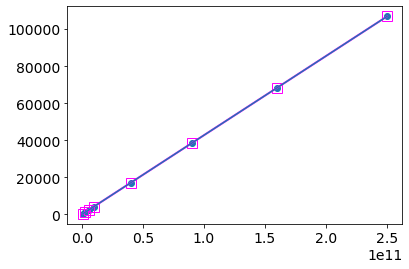

In [36]:
import matplotlib.pyplot as plt
from scipy import stats
y = dfBubbleMean16[dfBubbleMean16["Input case"]=="worst"]["Time - readCSV"]
x = dfBubbleMean16[dfBubbleMean16["Input case"]=="worst"]["Size^2"]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))
worst = polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == "worst"]["Size^2"], dfBubbleMean16[dfBubbleMean16["Input case"] == "worst"]["Time - readCSV"],1, "Merge time for worst case input", "fuchsia",dots="s")

print("LineReg: worst case r2 for bubble: ", metrics.r2_score(y,mymodel))
print("polyReg: worst case r2 for bubble: ", worst[1])
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show() 

# Comparing Quick WC to Bubble 

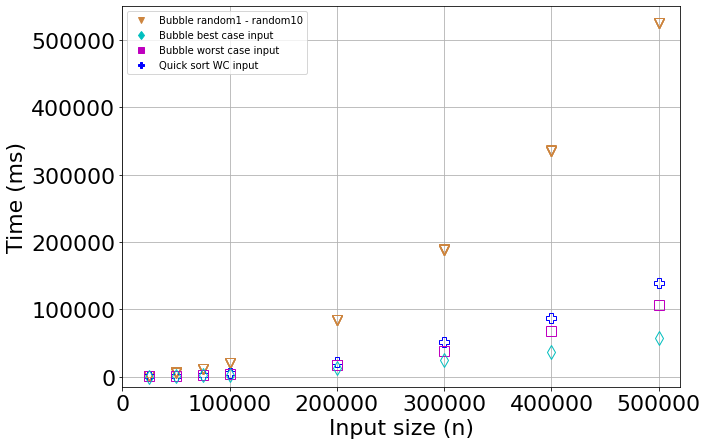

In [64]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []
plt.plot(-10000,-100000,"v", color="peru",label="Bubble random1 - random10")
plt.plot(-10000,-100000,"d", color="c",label="Bubble best case input")
plt.plot(-10000,-100000,"s", color="m",label="Bubble worst case input")
plt.plot(-10000,-100000,"P", color="b",label="Quick sort WC input")


for i in range(1,11):
    Rs.append(polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == f"random{i}"]["Size"], dfBubbleMean16[dfBubbleMean16["Input case"] == f"random{i}"]["Time - readCSV"],1, f"random{i} case input", "peru",dots="v",regLine=False))
quickWorst = polyReg(dfQuickMean16[dfQuickMean16["Input case"] == "worst"]["Size"], dfQuickMean16[dfQuickMean16["Input case"] == "worst"]["Time - readCSV"],1, "Merge time for best case input", "b",dots="P",regLine=False)
worst = polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == "worst"]["Size"], dfBubbleMean16[dfBubbleMean16["Input case"] == "worst"]["Time - readCSV"],1, "Merge time for worst case input", "m",dots="s",regLine=False)
best = polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == "best"]["Size"], dfBubbleMean16[dfBubbleMean16["Input case"] == "best"]["Time - readCSV"],1, "Merge time for best case input", "c",dots="d",regLine=False)

# for i in range(len(Rs)):
#     print(f"random{i} R2", Rs[i][1], " \n")
# print(f"worst R2 ", worst[1], "\n")
# print(f"best R2 ", best[1], "\n")

#plt.title("Quick- and bubble sort  wall time vs input size.")
plt.xlabel("Input size (n)", fontsize = 22)
plt.ylabel("Time (ms)", fontsize = 22)
plt.rc('xtick', labelsize = 22)
plt.rc('ytick', labelsize = 22)
plt.grid()
plt.ylim(-15000,550000)
plt.xlim(0,520000)
plt.legend(loc="upper left")
plt.show()

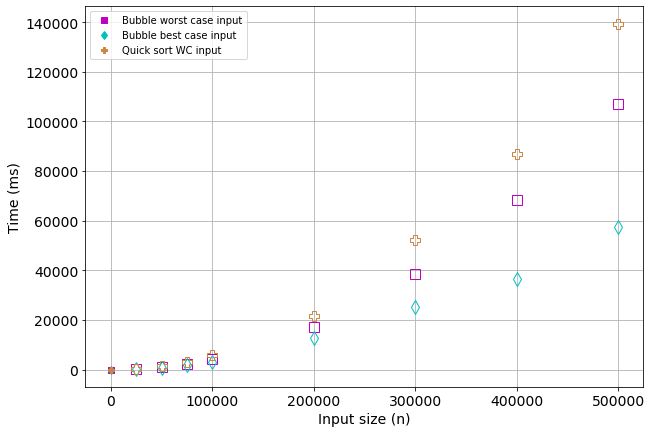

In [38]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []
# plt.plot(-0,0,"v", color="darkorange",label="random1 - random10")
plt.plot(-0,0,"s", color="m",label="Bubble worst case input")
plt.plot(-0,0,"d", color="c",label="Bubble best case input")
plt.plot(-0,0,"P", color="peru",label="Quick sort WC input")


# for i in range(1,11):
#     Rs.append(polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == f"random{i}"]["Size"], dfBubbleMean16[dfBubbleMean16["Input case"] == f"random{i}"]["Time - readCSV"],1, f"random{i} case input", "darkorange",dots="v",regLine=False))
worst = polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == "worst"]["Size"], dfBubbleMean16[dfBubbleMean16["Input case"] == "worst"]["Time - readCSV"],1, "Merge time for worst case input", "m",dots="s",regLine=False)
best = polyReg(dfBubbleMean16[dfBubbleMean16["Input case"] == "best"]["Size"], dfBubbleMean16[dfBubbleMean16["Input case"] == "best"]["Time - readCSV"],1, "Merge time for best case input", "c",dots="d",regLine=False)
quickWorst = polyReg(dfQuickMean16[dfQuickMean16["Input case"] == "worst"]["Size"], dfQuickMean16[dfQuickMean16["Input case"] == "worst"]["Time - readCSV"],1, "Merge time for best case input", "peru",dots="P",regLine=False)

# for i in range(len(Rs)):
#     print(f"random{i} R2", Rs[i][1], " \n")
# print(f"worst R2 ", worst[1], "\n")
# print(f"best R2 ", best[1], "\n")

#plt.title("Quick- and bubble sort  wall time vs input size.")
plt.xlabel("Input size (n)", fontsize = 14)
plt.ylabel("Time (ms)", fontsize = 14)
plt.rc('xtick', labelsize= 14) 
plt.rc('ytick', labelsize= 14) 
plt.grid()
plt.legend(loc="upper left")
plt.show()